In [164]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [158]:
class CustomDense(keras.layers.Layer):
    def __init__(self, input_shape, units):
        super().__init__()
        self.w = self.add_weight(name='w', shape=(input_shape, units), trainable=True, initializer='random_normal')
        self.b = self.add_weight(name='b', shape=(units,), trainable=True, initializer='zeros')
        
    def call(self, x):
        return tf.matmul(x, self.w) + self.b
    
class Relu(keras.layers.Layer):
    def __init__(self):
        super().__init__()
        
    def call(self, x):
        return tf.maximum(x, 0.1*x)
    
class CustomNormalize(keras.layers.Layer):
    def __init__(self):
        super().__init__()
        
    def call(self, x):
        x = tf.cast(x, dtype=float)
        return x/255.0

In [159]:
class MyModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = CustomDense((28*28), 64)
        self.dense2 = CustomDense(64, 10)
        self.relu = Relu()
        self.flatten = keras.layers.Flatten()
        self.normalize = CustomNormalize()
    def call(self, x):
        x = self.flatten(x)
        x = self.normalize(x)
        x = self.relu(self.dense1(x))
        return self.dense2(x)
    def model(self):
        x = keras.layers.Input(shape=(28*28))
        return keras.Model(inputs=[x], outputs=self.call(x))

In [160]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

validation_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [161]:
model = MyModel()
model.model().summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 custom_normalize_2 (CustomN  (None, 784)              0         
 ormalize)                                                       
                                                                 
 custom_dense_15 (CustomDens  (None, 64)               50240     
 e)                                                              
                                                                 
 relu_5 (Relu)               (None, 64)                0         
                                                                 
 custom_dense_16 (CustomDens  (None, 10)               650 

In [162]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )


In [163]:
model.fit(x_train, y_train, validation_data=validation_dataset, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3698 - accuracy: 0.8974 - val_loss: 0.2339 - val_accuracy: 0.9315
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2092 - accuracy: 0.9395 - val_loss: 0.1717 - val_accuracy: 0.9484
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1578 - accuracy: 0.9544 - val_loss: 0.1458 - val_accuracy: 0.9588
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1285 - accuracy: 0.9625 - val_loss: 0.1309 - val_accuracy: 0.9593
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9677 - val_loss: 0.1149 - val_accuracy: 0.9661


1/1 [==============================] - 0s 29ms/step


6

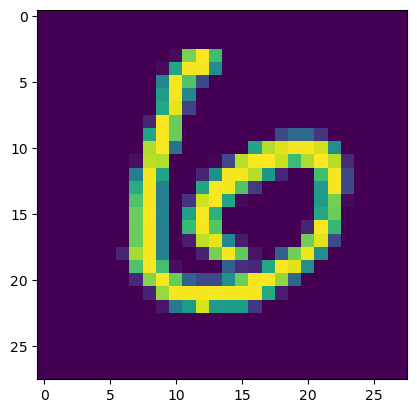

In [187]:
img = x_test[11]
plt.imshow(img)
tf.argmax(model.predict(img.reshape(1,28,28))[0]).numpy()